<a href="https://colab.research.google.com/github/hema082004/dr2024/blob/master/DLexp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the Reuters dataset
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)
# Vectorize the data using one-hot encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      results[i, sequence] = 1
    return results
    x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

# Convert the labels to one-hot vectors
num_classes = max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training set
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.2195 - loss: 3.4643 - val_accuracy: 0.5499 - val_loss: 2.1248
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.5033 - loss: 2.1744 - val_accuracy: 0.6380 - val_loss: 1.5908
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.5997 - loss: 1.7020 - val_accuracy: 0.6817 - val_loss: 1.4032
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.6512 - loss: 1.4748 - val_accuracy: 0.6928 - val_loss: 1.3172
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.6758 - loss: 1.3665 - val_accuracy: 0.6995 - val_loss: 1.2590
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6954 - loss: 1.2573 - val_accuracy: 0.7128 - val_loss: 1.2119
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7171 - loss: 1.1637 - val_accuracy: 0.7217 - val_loss: 1.1746
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7236 - loss: 1.1134 - val_accuracy: 0.7346 - 

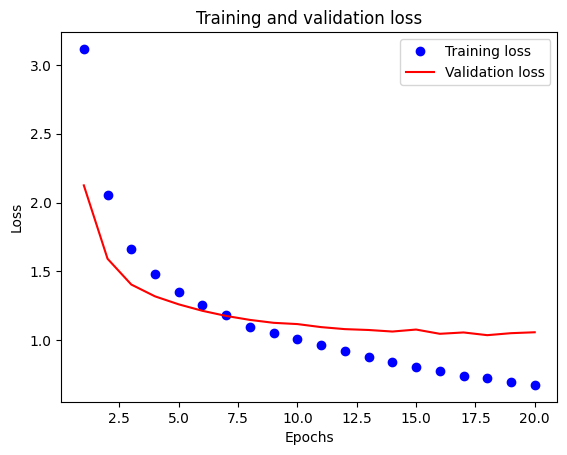

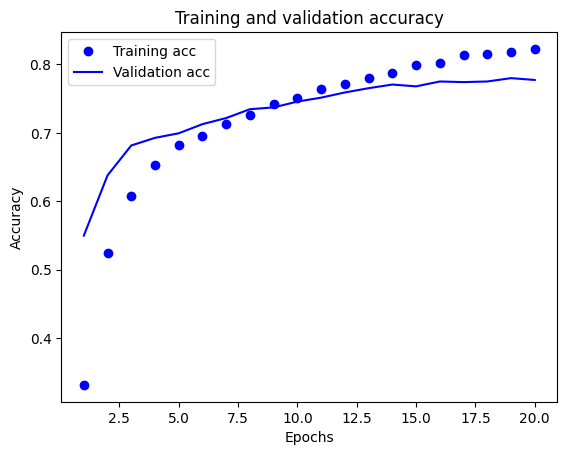

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix:
 [[ 6  1  0 ...  0  0  0]
 [ 0 88  0 ...  0  0  0]
 [ 0  3 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.57      0.84      0.68       105
           2       0.60      0.60      0.60        20
           3       0.92      0.94      0.93       813
           4       0.84      0.88      0.86       474
           5       0.00      0.00      0.00         5
           6       0.73      0.79      0.76        14
           7       0.00      0.00      0.00         3
           8       0.68      0.68      0.68        38
           9       0.64      0.72      0.68        25
          10       0.76      0.87      0.81        30
          11       0.55      0.81      0.65        83
          12       1.00      0.08      0.14        13
     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the Reuters dataset
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)
# Vectorize the data using one-hot encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      results[i, sequence] = 1
    return results
# Correct the indentation for these two lines:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

# Convert the labels to one-hot vectors
num_classes = max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training set
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
from sklearn.metrics import confusion_matrix, classification_report

# Predict the classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Generate a classification report
report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", report)